In [1]:
"""
auteur:Alexandre
date:2024/09/03

Première exploration des données en utilisant des graphiques simples
"""

'\nauteur:Alexandre\ndate:2024/09/03\n\nPremière exploration des données en utilisant des graphiques simples\n'

# **Visualisation et Exploration**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import params as prm
import pandas as pd
import numpy as np
import os

## Résultats des élections

In [3]:
df_1f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_1er_tour}.csv"))
df_2f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_2nd_tour}.csv"))

In [4]:
# Noramlisation
df_1f_norm = pd.DataFrame((df_1f[df_1f.keys()[:-2]].to_numpy().T / df_1f["Exprimés"].to_numpy()).T,
                           columns=df_1f.keys()[:-2])
df_2f_norm = pd.DataFrame((df_2f[df_2f.keys()[:-2]].to_numpy().T / df_2f["Exprimés"].to_numpy()).T,
                           columns=df_2f.keys()[:-2])

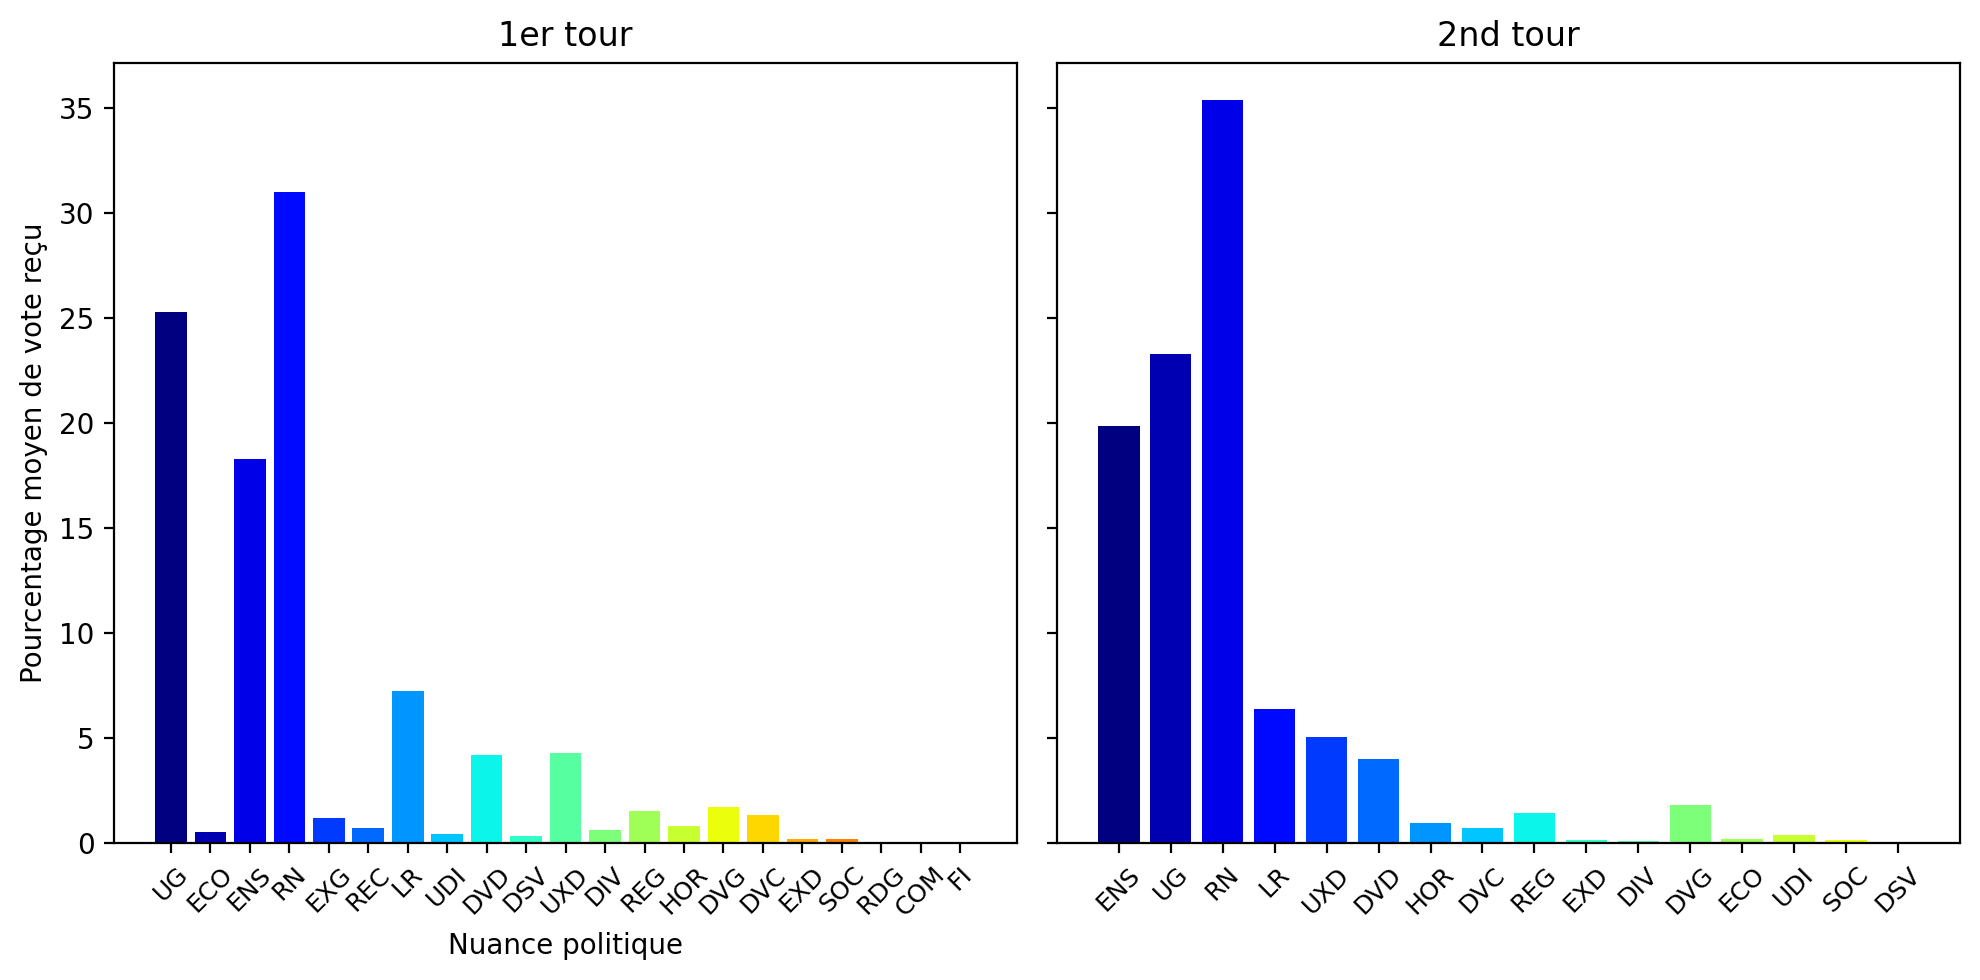

In [15]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10,5),
    dpi=200, 
    sharey=True
)

ax[0].bar(
    x=df_1f_norm.keys(),
    height=df_1f_norm.mean()*100,
    color=prm.cm_jet(np.linspace(0,1, len(df_1f.keys()))),
)

ax[1].bar(
    x=df_2f_norm.keys(),
    height=df_2f_norm.mean()*100,
    color=prm.cm_jet(np.linspace(0,1, len(df_1f.keys())))
)

ax[0].set_xticks(
    df_1f_norm.keys(),
    df_1f_norm.keys(),
    rotation=45,
    size=9
)
ax[1].set_xticks(
    df_2f_norm.keys(),
    df_2f_norm.keys(),
    rotation=45,
    size=9
)

ax[0].set_xlabel("Nuance politique")
ax[0].set_ylabel("Pourcentage moyen de vote reçu")

ax[0].set_title("1er tour")
ax[1].set_title("2nd tour")

plt.tight_layout()
plt.savefig(
    os.path.join(prm.figures_path, "Distribution_votes_1er_et_2nd_tour.pdf"),
    dpi=200
)
plt.show()

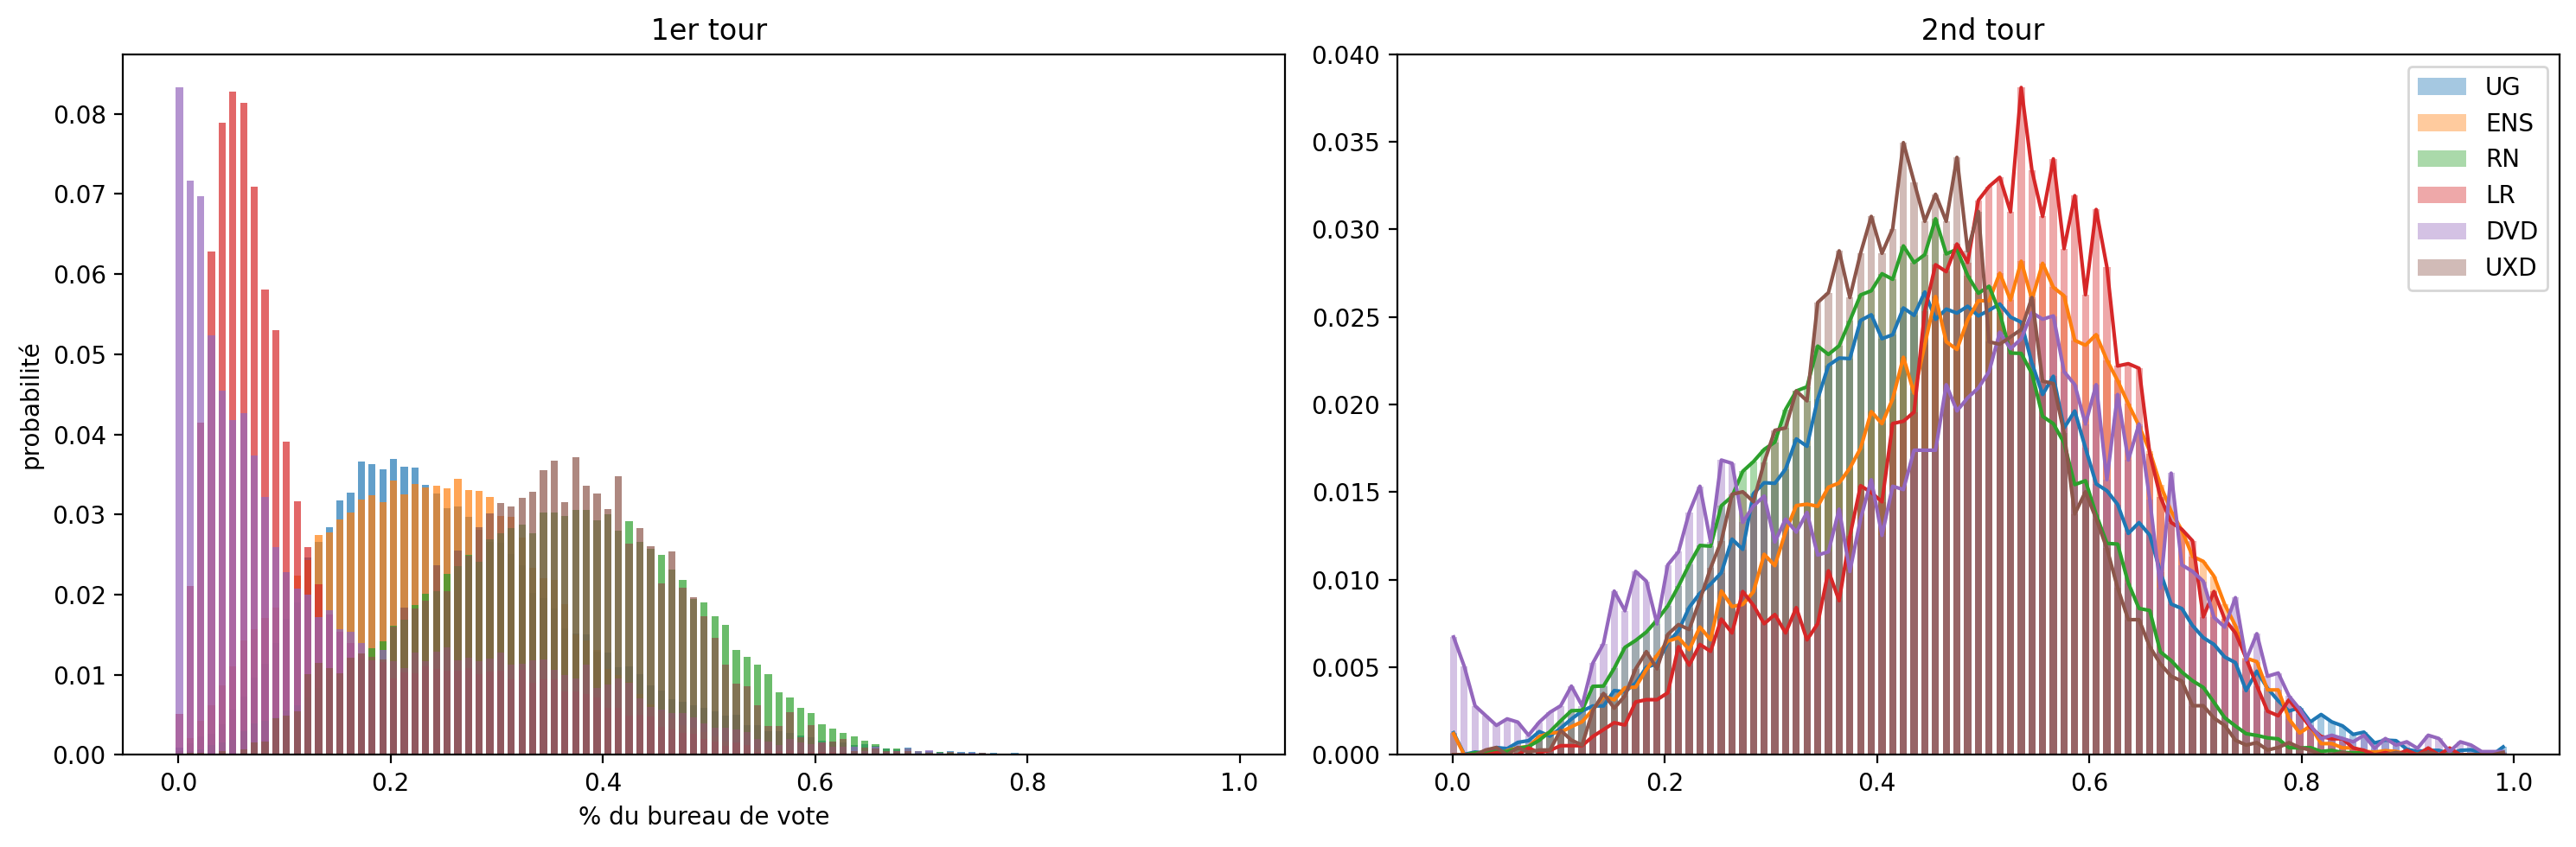

In [6]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(15,5),
    dpi=200
)

for grp in prm.Grandes_Nuances:
    
    to_plot = df_1f_norm[grp].to_numpy()

    values, bins = np.histogram(
        a=to_plot, bins=np.linspace(0.001, 1, 100)
    )

    ax[0].bar(
        x=bins[:-1],
        height=values/(values.sum()+1),
        width=(bins[1]-bins[0])/1.5,
        alpha=0.7, label=grp
    )

    to_plot = df_2f_norm[grp].to_numpy()

    values, bins = np.histogram(
        a=to_plot, bins=np.linspace(0.001, 1, 100)
    )

    ax[1].bar(
        x=bins[:-1],
        height=values/values.sum(),
        width=(bins[1]-bins[0])/1.5,
        alpha=0.4, label=grp
    )
    ax[1].plot(
        bins[:-1],
        values/values.sum(),
        alpha=1
    )

ax[0].set_title(" 1er tour")
ax[1].set_title(" 2nd tour")
ax[0].set_ylabel("probabilité")
ax[0].set_xlabel("% du bureau de vote")
ax[1].legend()

plt.tight_layout()
plt.savefig(
    os.path.join(prm.figures_path, "Distribution_bv_1er_et_2nd_tour.pdf"),
    dpi=200
)
plt.show()

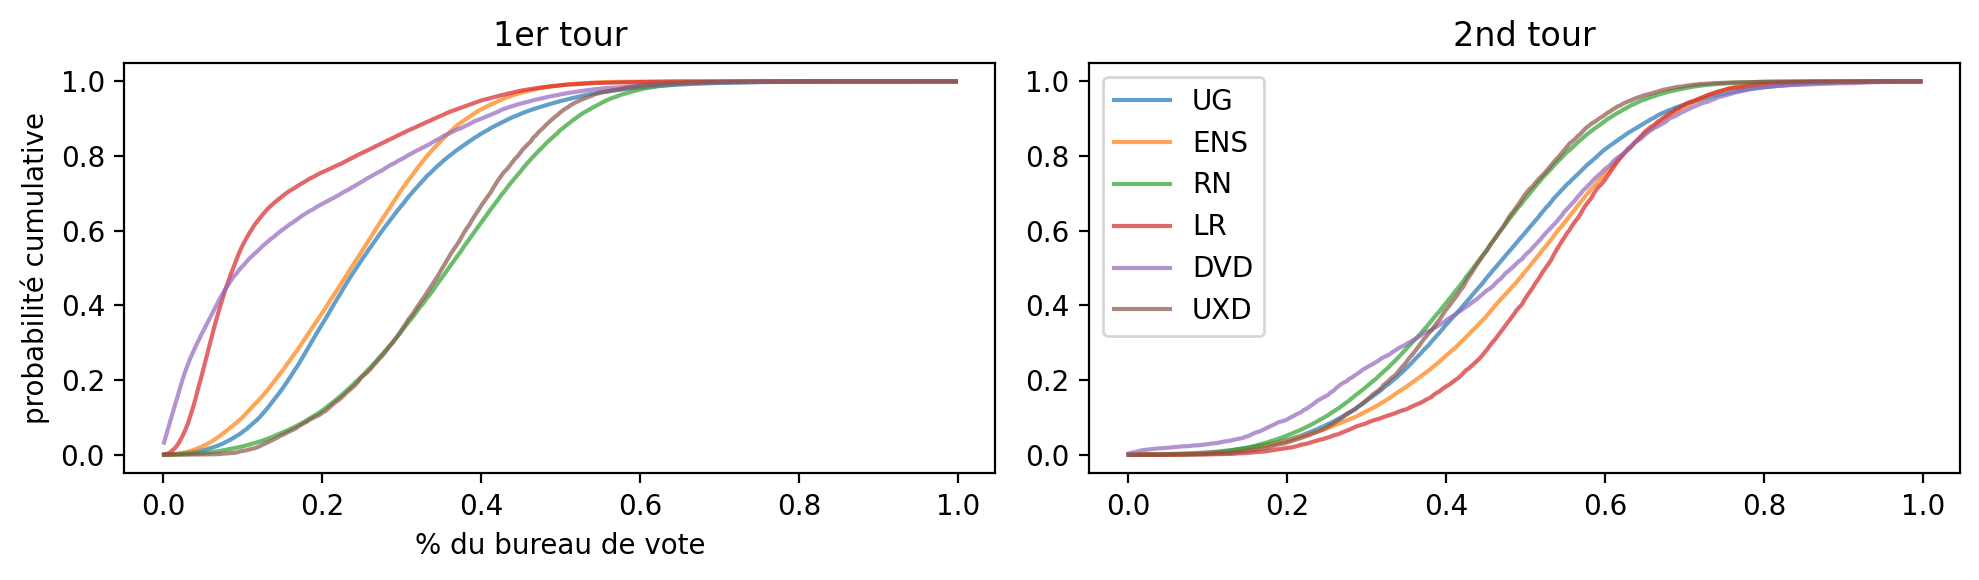

In [7]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10,3),
    dpi=200
)

for grp in prm.Grandes_Nuances:
    
    to_plot = df_1f_norm[grp].to_numpy()

    values, bins = np.histogram(
        a=to_plot, bins=np.linspace(0.001, 1, 300)
    )

    ax[0].plot(
        bins[:-1],
        np.cumsum(values/(values.sum()+1)),
        alpha=0.7, label=grp
    )

    to_plot = df_2f_norm[grp].to_numpy()

    values, bins = np.histogram(
        a=to_plot, bins=np.linspace(0.001, 1, 300)
    )

    ax[1].plot(
        bins[:-1],
        np.cumsum(values/(values.sum()+1)),
        alpha=0.7, label=grp
    )

ax[0].set_title("1er tour")
ax[1].set_title("2nd tour")
ax[0].set_ylabel("probabilité cumulative")
ax[0].set_xlabel("% du bureau de vote")
ax[1].legend()

plt.tight_layout()
plt.savefig(
    os.path.join(prm.figures_path, "Cumulative_bv_1er_et_2nd_tour.pdf"),
    dpi=200
)
plt.show()

In [8]:
# Comparaison statistique des distributions
import scipy.stats as stt

ks_results_1 = np.zeros((len(prm.Grandes_Nuances),len(prm.Grandes_Nuances)))
ks_results_2 = np.zeros((len(prm.Grandes_Nuances),len(prm.Grandes_Nuances)))

for i1, grp_1 in enumerate(prm.Grandes_Nuances):
    for i2, grp_2 in enumerate(prm.Grandes_Nuances):
        
        x_1 = df_1f_norm[grp_1].to_numpy()
        x_2 = df_1f_norm[grp_2].to_numpy()

        ks_results_1[i1,i2] = stt.ks_2samp(
            x_1,
            x_2
        )[1]

        x_1 = df_2f_norm[grp_1].to_numpy()
        x_2 = df_2f_norm[grp_2].to_numpy()

        ks_results_2[i1,i2] = stt.ks_2samp(
            x_1,
            x_2
        )[1]

In [35]:
prm.WaTer()

Last updated: 2024-09-11T20:45:35.042044+02:00

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.24.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 116 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit

